In [0]:
#Tesseract installing
!sudo add-apt-repository ppa:alex-p/tesseract-ocr-devel -y
!sudo apt-get update
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
!pip install imantics

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 http://ppa.launchpad.net/alex-p/tesseract-ocr-devel/ubuntu bionic InRelease [15.4 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packages [32.9 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease 

In [0]:
#Loading of Levenshtein package
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144800 sha256=3f4dd5e040b2c51e7dadbad05b54d516d9bd4458d5dc09ac8a8887b7f54671c0
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [0]:
from keras import utils
import keras_preprocessing.image.utils as image_utils
from PIL import Image, ImageDraw
from imantics import Mask
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import pytesseract
from Levenshtein import *


WORKDIR = "src/Text extraction"

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#This code is for creating a special files for model training. Because the model has already trained, code is inactive

In [0]:
#%cd src/Text\ extraction
#!/usr/share/tesseract-ocr/tesstrain.sh --fonts_dir fonts \
#    --fontlist "SupernormaleW00-Regular" \
#    --lang eng \
#    --linedata_only \
#   --langdata_dir langdata_lstm \
#    --tessdata_dir tessdata \
#    --save_box_tiff \
#    --maxpages 20 \
#    --output_dir trainn \

/content/drive/My Drive/Colab Notebooks/Materials/Text extraction

=== Starting training for language 'eng'
[Fri Jun 12 13:33:07 UTC 2020] /usr/bin/text2image --fonts_dir=fonts --ptsize 12 --font=SupernormaleW00-Regular --outputbase=/tmp/font_tmp.7XHO4hGqUL/sample_text.txt --text=/tmp/font_tmp.7XHO4hGqUL/sample_text.txt --fontconfig_tmpdir=/tmp/font_tmp.7XHO4hGqUL
Rendered page 0 to file /tmp/font_tmp.7XHO4hGqUL/sample_text.txt.tif

=== Phase I: Generating training images ===
Rendering using SupernormaleW00-Regular
[Fri Jun 12 13:33:09 UTC 2020] /usr/bin/text2image --fontconfig_tmpdir=/tmp/font_tmp.7XHO4hGqUL --fonts_dir=fonts --strip_unrenderable_words --leading=32 --xsize=3600 --char_spacing=0.0 --exposure=0 --outputbase=/tmp/eng-2020-06-12.HU6/eng.SupernormaleW00-Regular.exp0 --max_pages=20 --font=SupernormaleW00-Regular --ptsize 12 --text=langdata_lstm/eng/eng.training_text
Stripped 158 unrenderable words
Rendered page 0 to file /tmp/eng-2020-06-12.HU6/eng.SupernormaleW00-Regular.e

In [0]:
#%cd src/Text\ extraction
#!combine_tessdata -e traineddata/game_stat.traineddata trainn/eng.lstm

/content/drive/My Drive/Colab Notebooks/Materials/Text extraction
Extracting tessdata components from traineddata/game_stat.traineddata
Wrote trainn/eng.lstm
Version string:4.00.00alpha:eng:synth20170629:[1,36,0,1Ct3,3,16Mp3,3Lfys64Lfx96Lrx96Lfx512O1c1]
17:lstm:size=11689099, offset=192
18:lstm-punc-dawg:size=4322, offset=11689291
19:lstm-word-dawg:size=3694794, offset=11693613
20:lstm-number-dawg:size=4738, offset=15388407
21:lstm-unicharset:size=6360, offset=15393145
22:lstm-recoder:size=1012, offset=15399505
23:version:size=80, offset=15400517


In [0]:
#%cd src/Text\ extraction/
#!lstmtraining \
#  --continue_from trainn/eng.lstm \
#  --model_output outputt/images_Supernormal \
#  --traineddata traineddata/game_stat.traineddata \
#  --train_listfile trainn/eng.training_files.txt \
#  --debug_interval -1 --max_iterations 500

In [0]:
#%cd src/Text\ extraction/
#!lstmtraining --stop_training \
#  --continue_from outputt/images_Supernormal_checkpoint \
#  --traineddata traineddata/game_stat.traineddata \
#  --model_output images_Supernormal.traineddata

/content/drive/My Drive/Colab Notebooks/Materials/Text extraction
Loaded file outputt/images_Supernormal_checkpoint, unpacking...


In [0]:
!cp 'src/Text extraction/traineddata/SupernormalW00.traineddata' /usr/share/tesseract-ocr/5/tessdata/SupernormalW00.traineddata

In [0]:
def getCvImage(name):
  gray = cv2.imread(name, cv2.IMREAD_GRAYSCALE) #cv2.IMREAD_GRAYSCALE
  for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
      gray[i][j] = 255 - gray[i][j]
  return gray

def getCvImage1(name):
  gray =  cv2.imread(name, cv2.IMREAD_GRAYSCALE)
  return gray

def getPilImage(name):
  img = Image.open(name).convert('LA')
  arr = np.array(img)
  for i in range(len(arr)):
    for j in range(len(arr[i])):
      arr[i][j][0] = 255 - arr[i][j][0]
  img = Image.fromarray(arr)
  return img

def argument(cortage):
  return cortage[0]

def d_argument(cortage):
  return cortage[2]

In [0]:
import csv
reader = csv.DictReader(open("src/Text extraction/csv/tesseract_stats_dataset.csv"))
stats = []
for raw in reader:
    dictt = {}
    strin = list(raw['image_name;team_stats1;team_stats2'].split(';'))
    dictt['image_name'] = strin[0]
    dictt['team_stats1'] = strin[1]
    dictt['team_stats2'] = strin[2]
    stats.append(dictt)

In [0]:
#Data loading and validation of standard and learned models

preds = []
c=0
dist = 0
gs_dist = 0
all_len = 0
fig = plt.figure(figsize=(200, 200))
for filename in sorted(glob.glob(WORKDIR + '/datasets/tesseract_stats/test/*.png')):
  img1 = getCvImage(filename)
  pred2 = pytesseract.image_to_string(img1, lang = "SupernormalW00", config = '--psm 6 -c tessedit_char_whitelist="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ[]_- "')
  pred1 = pytesseract.image_to_string(img1, config = '--psm 6 -c tessedit_char_whitelist="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ[]_- "')
  st = list(filename.split("/"))
  c+=1
  t_pred1 = ''
  for ch in pred1:
    if ch != '\n':
      t_pred1+=ch
  pred1 = t_pred1
  t_pred2 = ''
  for ch in pred2:
    if ch != '\n':
      t_pred2+=ch
  pred2= t_pred2
  name = st[-1].split("_")
  for stat in stats:
    if stat['image_name'] == name[1]:
      if name[0] == '1':
        dist+=distance(pred1, stat['team_stats1'])
        gs_dist+=distance(pred2, stat['team_stats1'])
        all_len+=len(stat['team_stats1'])
        preds.append((st[-2] + '/' + st[-1],
                      round(distance(pred1, stat['team_stats1'])/len(stat['team_stats1']),3), 
                      round(distance(pred2, stat['team_stats1'])/len(stat['team_stats1']), 3), 
                      distance(pred1, stat['team_stats1']),
                      distance(pred2, stat['team_stats1']),
                      pred1,
                      pred2))
      elif name[0] == '2':
        dist+=distance(pred1, stat['team_stats2'])
        gs_dist+=distance(pred2, stat['team_stats2'])
        all_len+=len(stat['team_stats2'])
        preds.append((st[-2] + '/' + st[-1],
                      round(distance(pred1, stat['team_stats2'])/len(stat['team_stats2']), 3), 
                      round(distance(pred2, stat['team_stats2'])/len(stat['team_stats2']), 3), 
                      distance(pred1, stat['team_stats2']), 
                      distance(pred2, stat['team_stats2']), 
                      pred1, 
                      pred2))

#plt.show()
for filename in sorted(glob.glob(WORKDIR + '/datasets/tesseract_stats/validation/*.png')):
  img1 = getCvImage(filename)
  pred2 = pytesseract.image_to_string(img1, lang = "SupernormalW00", config = '--psm 6 -c tessedit_char_whitelist="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ[]_- "')
  pred1 = pytesseract.image_to_string(img1, config = '--psm 6 -c tessedit_char_whitelist="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ[]_- "')
  
  st = list(filename.split("/"))
  c+=1
  t_pred1 = ''
  for ch in pred1:
    if ch != '\n':
      t_pred1+=ch
  pred1 = t_pred1
  t_pred2 = ''
  for ch in pred2:
    if ch != '\n':
      t_pred2+=ch
  pred2= t_pred2
  name = st[-1].split("_")
  for stat in stats:
    if stat['image_name'] == name[1]:
      if name[0] == '1':
        dist+=distance(pred1, stat['team_stats1'])
        gs_dist+=distance(pred2, stat['team_stats1'])
        all_len+=len(stat['team_stats1'])
        preds.append((st[-2] + '/' + st[-1],
                      round(distance(pred1, stat['team_stats1'])/len(stat['team_stats1']),3), 
                      round(distance(pred2, stat['team_stats1'])/len(stat['team_stats1']), 3), 
                      distance(pred1, stat['team_stats1']),
                      distance(pred2, stat['team_stats1']),
                      pred1,
                      pred2))
      elif name[0] == '2':
        dist+=distance(pred1, stat['team_stats2'])
        gs_dist+=distance(pred2, stat['team_stats2'])
        all_len+=len(stat['team_stats2'])
        preds.append((st[-2] + '/' + st[-1],
                      round(distance(pred1, stat['team_stats2'])/len(stat['team_stats2']), 3), 
                      round(distance(pred2, stat['team_stats2'])/len(stat['team_stats2']), 3), 
                      distance(pred1, stat['team_stats2']), 
                      distance(pred2, stat['team_stats2']), 
                      pred1, 
                      pred2))
print(dist)
print(dist/all_len)
print(gs_dist)
print(gs_dist/all_len)

1078
0.13662864385297846
371
0.04702154626108999


<Figure size 14400x14400 with 0 Axes>

In [0]:
counterr = 0
for pred in preds:
  if pred[2] == 0.0:
    counterr+=1
print(counterr)

30


In [0]:
#Dataframe with results of learning

FILENAME = 'src/Text extraction/csv/results_with_fonts.csv'
df = pd.read_csv(FILENAME)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df.head(80)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,image_name,error_on_images,error_on_images_and_fonts,value_on_images,value_on_images_and_fonts,prediction_on_images,prediction_on_images_and_fonts
0,test/1_54.png,0.000,0.000,0,0,[CIGS]angrygnome44 0 0 0[LIVE]uResponsive 0 0 0Ripbodys 0 0 0[CG]ilyRusty 0 0 0,[CIGS]angrygnome44 0 0 0[LIVE]uResponsive 0 0 0Ripbodys 0 0 0[CG]ilyRusty 0 0 0
1,test/1_62.png,0.042,0.000,4,0,[LIVE]uResponsive 9808 4 991Ripbodys 675 2 423[CG]ilyRusty 429 2 924[CIGS]angrygnome44 400 1 330,[LIVE]uResponsive 900 4 991Ripbodys 675 2 423[CG]ilyRusty 425 2 524[CIGS]angrygnome44 400 1 330
2,test/1_65.png,0.021,0.000,2,0,[LIVE]uResponsive 1125 4 1356Ripbodys 700 2 555[CIGS]angrygnomeaa 625 1 576[CG]ilyRusty 425 2 580,[LIVE]uResponsive 1125 4 1356Ripbodys 700 2 555[CIGS]angrygnome44 625 1 576[CG]ilyRusty 425 2 580
3,test/1_78.png,0.000,0.000,0,0,[LIVE]uResponsive 2825 7 3706[CIGS]angrygnome44 2200 5 3361[CG]ilyRusty 2075 5 2829,[LIVE]uResponsive 2825 7 3706[CIGS]angrygnome44 2200 5 3361[CG]ilyRusty 2075 5 2829
4,test/1_80.png,0.000,0.000,0,0,[LIVE]uResponsive 3100 8 4198[CIGS]angrygnome44 2200 5 3493[CG]ilyRusty 2075 5 2998,[LIVE]uResponsive 3100 8 4198[CIGS]angrygnome44 2200 5 3493[CG]ilyRusty 2075 5 2998
5,test/2_53.png,0.011,0.000,1,0,[Xim4]ChronicTavon 0 0 0[KOGE]StafaBeams 0 0 0[U4ss]FuEeGo_o 0 0 0[7]easewin 0 0 0Jarfull 0 0 0,[Xim4]ChronicTavon 0 0 0[KOBE]StafaBeams 0 0 0[U4ss]FuEeGo_o 0 0 0[7]easewin 0 0 0Jarfull 0 0 0
6,test/2_62.png,0.023,0.000,2,0,Jarfull 42s 1 6608[U4ss]FuEeGo_o 200 0 408[7]easewin 200 0 162[KOBE]StafaBeams 100 0 263,Jarfull 425 1 608[U4ss]FuEeGo_o 200 0 408[7]easewin 200 0 162[KOBE]StafaBeams 100 0 263
7,test/2_66.png,0.000,0.000,0,0,Jarfull 725 2 950[KOBE]StafaBeams 500 3 625[U4ss]FuEeGo_o 450 1 957[7]easewin 300 1 514,Jarfull 725 2 950[KOBE]StafaBeams 500 3 625[U4ss]FuEeGo_o 450 1 957[7]easewin 300 1 514
8,test/2_78.png,0.000,0.000,0,0,[KOBE]StafaBeams 3075 13 3340Jarfull 2885 12 3640[7]easewin 1690 6 2042[U4ss]FuEeGo_o 1600 7 2581,[KOBE]StafaBeams 3075 13 3340Jarfull 2885 12 3640[7]easewin 1690 6 2042[U4ss]FuEeGo_o 1600 7 2581
9,test/2_80.png,0.031,0.000,3,0,[KOBE]StafaBeams 3075 13 3471Jafull 2885 12 3897[7]leasewin 2220 7 2437[UAss]FuEeGo_o 1700 7 2703,[KOBE]StafaBeams 3075 13 3471Jarfull 2885 12 3897[7]easewin 2220 7 2437[U4ss]FuEeGo_o 1700 7 2703


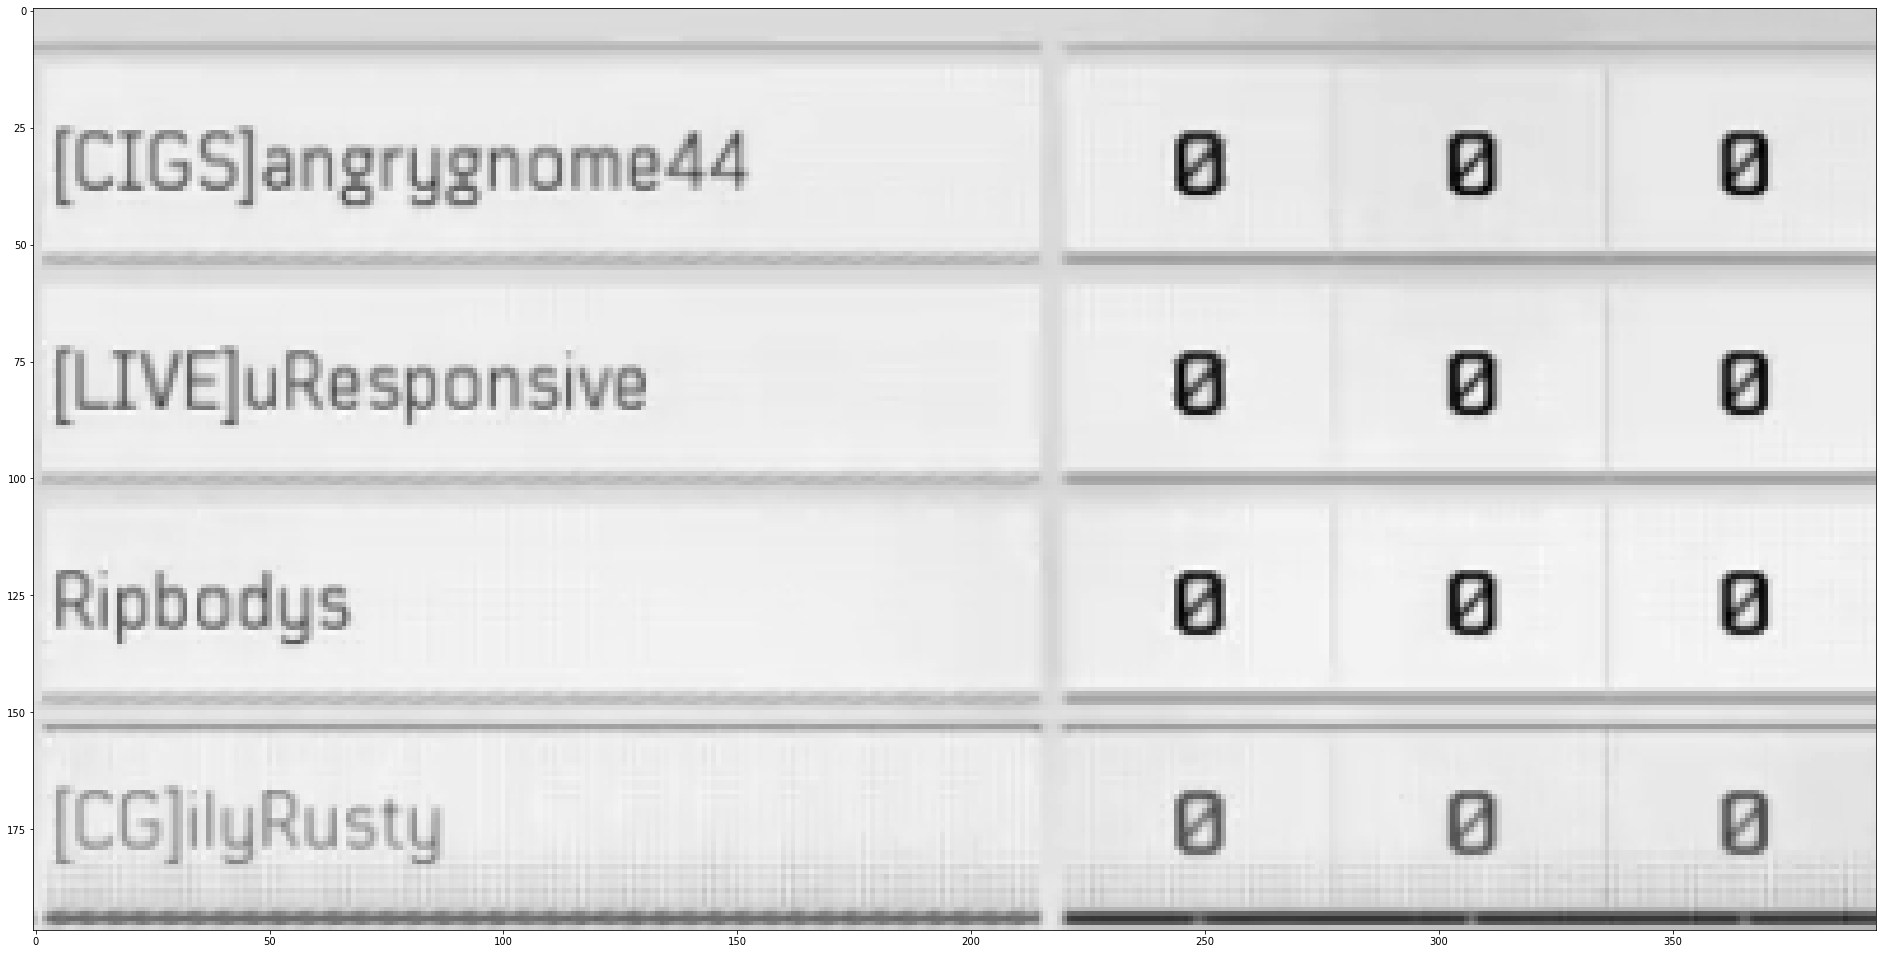

name:  test/1_54.png
metrics:  0.0
another_metrics:  0.228
pred:  0
1red:  18


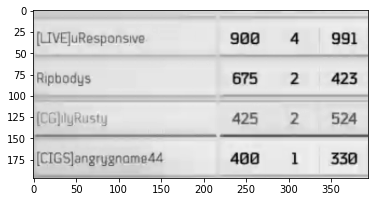

name:  test/1_62.png
metrics:  0.0
another_metrics:  0.168
pred:  0
1red:  16


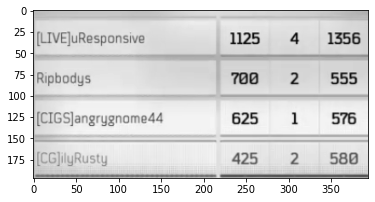

name:  test/1_65.png
metrics:  0.0
another_metrics:  0.072
pred:  0
1red:  7


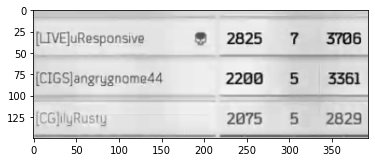

name:  test/1_78.png
metrics:  0.0
another_metrics:  0.036
pred:  0
1red:  3


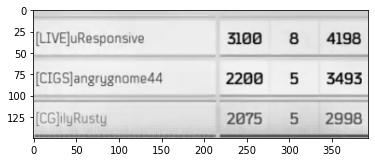

name:  test/1_80.png
metrics:  0.0
another_metrics:  0.048
pred:  0
1red:  4


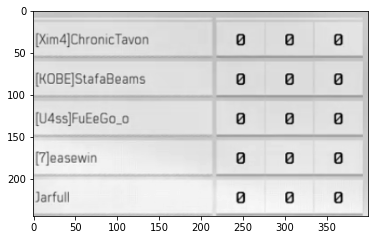

name:  test/2_53.png
metrics:  0.0
another_metrics:  0.2
pred:  0
1red:  19


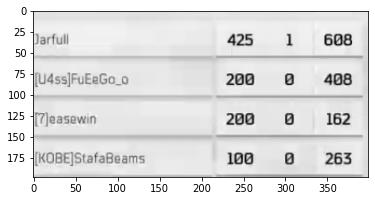

name:  test/2_62.png
metrics:  0.0
another_metrics:  0.138
pred:  0
1red:  12


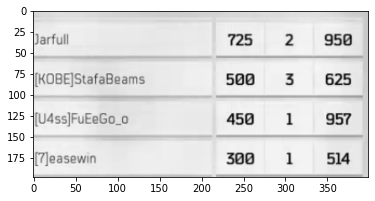

name:  test/2_66.png
metrics:  0.0
another_metrics:  0.057
pred:  0
1red:  5


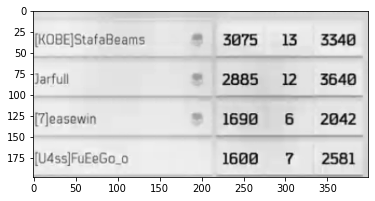

name:  test/2_78.png
metrics:  0.0
another_metrics:  0.031
pred:  0
1red:  3


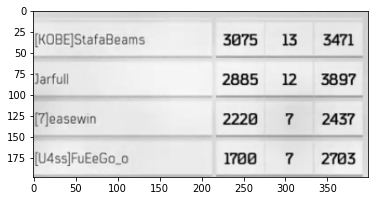

name:  test/2_80.png
metrics:  0.0
another_metrics:  0.093
pred:  0
1red:  9
test/1_54.png
test/1_62.png
test/1_65.png
test/1_78.png
test/1_80.png
test/2_53.png
test/2_62.png
test/2_66.png
test/2_78.png
test/2_80.png


In [0]:
#Showing best 10 results

sorted_preds = sorted(preds, key=d_argument)
best_10 = sorted_preds[0:10]
worst_10 = list(reversed(sorted_preds[slice(-1, -11, -1)]))

c = 0
wor = []
fig = plt.figure(figsize=(200, 200))
for i in range(0,10):
  img1 = getCvImage(WORKDIR + '/datasets/tessaract_stats/' + best_10[i][0])
  fig.add_subplot(10, 1, c+1)
  plt.imshow(img1, "gray")
  plt.show()
  print("name: ", best_10[i][0])
  print("metrics: ", best_10[i][2])
  print("another_metrics: ", best_10[i][1])
  print("pred: ", best_10[i][4])
  print("1red: ", best_10[i][3])



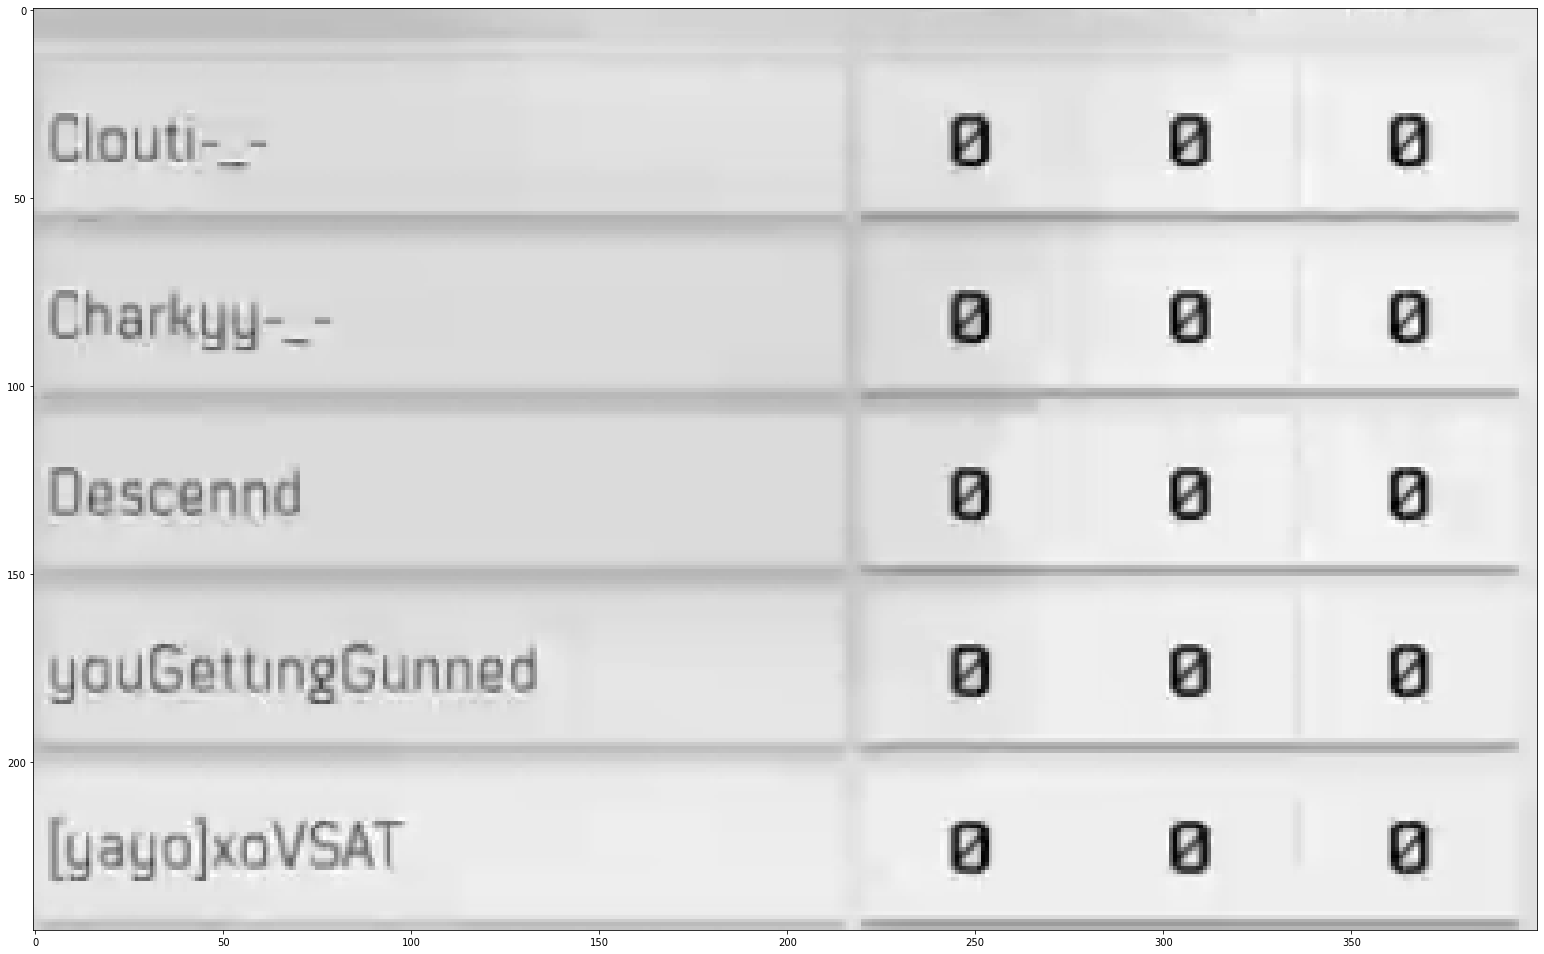

name:  validation/2_15.png
metrics:  0.106
another_metrics:  0.271
pred:  9
1red:  23


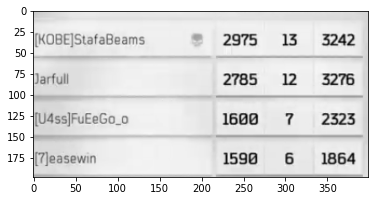

name:  validation/2_76.png
metrics:  0.113
another_metrics:  0.124
pred:  11
1red:  12


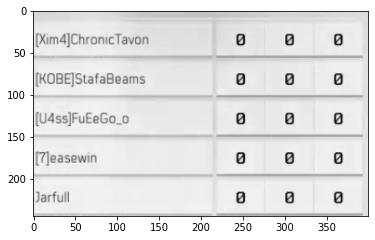

name:  test/2_55.png
metrics:  0.116
another_metrics:  0.326
pred:  11
1red:  31


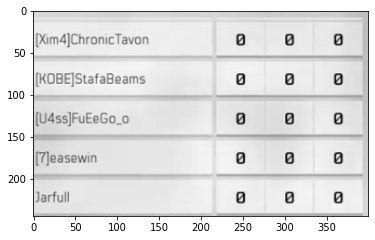

name:  validation/2_51.png
metrics:  0.126
another_metrics:  0.326
pred:  12
1red:  31


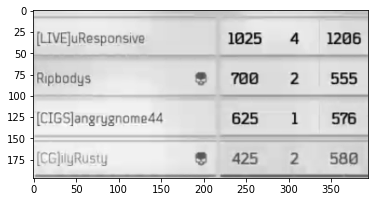

name:  test/1_64.png
metrics:  0.134
another_metrics:  0.082
pred:  13
1red:  8


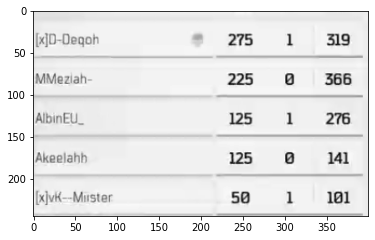

name:  validation/2_1.png
metrics:  0.134
another_metrics:  0.175
pred:  13
1red:  17


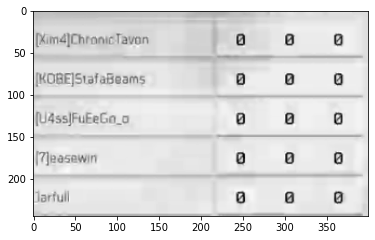

name:  test/2_52.png
metrics:  0.137
another_metrics:  0.389
pred:  13
1red:  37


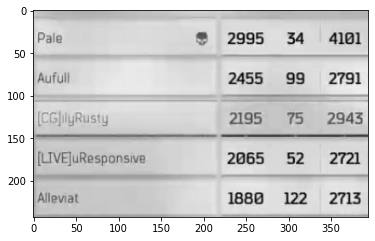

name:  validation/1_10.png
metrics:  0.168
another_metrics:  0.142
pred:  19
1red:  16


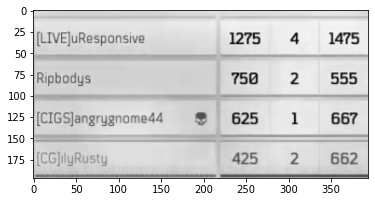

name:  test/1_66.png
metrics:  0.258
another_metrics:  0.258
pred:  25
1red:  25


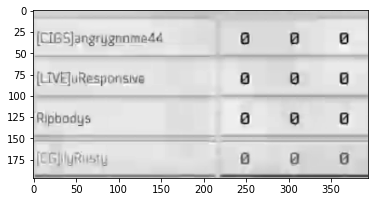

name:  test/1_52.png
metrics:  0.696
another_metrics:  0.759
pred:  55
1red:  60
validation/2_15.png
validation/2_76.png
test/2_55.png
validation/2_51.png
validation/2_1.png
test/2_52.png
test/1_52.png


In [0]:
#Showing worst 10 results

c = 0
wr = []
fig = plt.figure(figsize=(200, 200))
for i in range(0,10):
  img2 = getCvImage(WORKDIR + '/datasets/tessaract_stats/' + worst_10[i][0])
  fig.add_subplot(10, 1, c+1)
  plt.imshow(img2, "gray")
  plt.show()
  print("name: ", worst_10[i][0])
  print("metrics: ", worst_10[i][2])
  print("another_metrics: ", worst_10[i][1])
  print("pred: ", worst_10[i][4])
  print("1red: ", worst_10[i][3])

In [0]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/Screen\ segmentation/datasets/tessaract4/train/blackwhite
!ls -1 *.lstmf > all-lstmf

/content/drive/My Drive/Colab Notebooks/Screen segmentation/datasets/tessaract4/train/reserve
